In [1]:
#References
#https://colab.research.google.com/drive/1ycJQ6iDaoeamkFKxnORYuihz43bWKZcU#scrollTo=cnwwdFJdzp8o
#https://colab.research.google.com/drive/1qDXvy4fp1Px80i04YNz7XJdDZLlUvAn0#scrollTo=bgxrG0VFwsm_

In [2]:
# Part-1: Importing Libraries

In [3]:
import numpy as np
import numpy as np
import pandas as pd
import os
import joblib as jb
from collections import defaultdict
from itertools import groupby
from math import sqrt, atan2
import matplotlib.pyplot as plt
import pywt
from scipy.signal import savgol_filter

In [4]:
# Part-2: Loading Data

In [5]:
# P 26 . . . P 30 defines the participant’s identity and fiber, wood, and glass are obsta-
# cles of width 0.5 × 4in placed between the Access point and Receiving device during data
# collection.



#Fiber

P26_fiber_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P26_fiber_4.csv")
P27_fiber_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P27_fiber_4.csv")
P28_fiber_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P28_fiber_4.csv")
P29_fiber_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P29_fiber_4.csv")
P30_fiber_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P30_fiber_4.csv")

#Wood

P26_wood_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P26_wood_4.csv")
P27_wood_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P27_wood_4.csv")
P28_wood_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P28_wood_4.csv")
P29_wood_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P29_wood_4.csv")
P30_wood_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P30_wood_4.csv")

#Glass
P26_glass_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P26_glass_4.csv")
P27_glass_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P27_glass_4.csv")
P28_glass_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P28_glass_4.csv")
P29_glass_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P29_glass_4.csv")
P30_glass_4=pd.read_csv("C:/Users/lbjki/Downloads/wild/P30_glass_4.csv")

In [6]:
P26_fiber_4

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_377,col_378,col_379,col_380,col_381,col_382,col_383,col_384,timestamp,headlabel
0,82,-96,4,0,0,0,0,0,0,0,...,-14.0,9.0,-12.0,9.0,-7.0,9.0,-1.0,-1.0,1.689773e+09,Looking Down
1,110,96,6,0,0,0,0,0,0,0,...,-5.0,8.0,-4.0,7.0,-3.0,8.0,-1.0,-1.0,1.689773e+09,Looking Down
2,110,96,6,0,0,0,0,0,0,0,...,10.0,-19.0,10.0,-15.0,2.0,-20.0,-1.0,-1.0,1.689773e+09,Looking Down
3,110,96,6,0,0,0,0,0,0,0,...,-16.0,6.0,-15.0,9.0,-12.0,8.0,-1.0,-1.0,1.689773e+09,Looking Down
4,110,96,6,0,0,0,0,0,0,0,...,-15.0,22.0,-14.0,20.0,-10.0,23.0,-1.0,-1.0,1.689773e+09,Looking Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,110,96,6,0,0,0,0,0,0,0,...,-8.0,-30.0,-9.0,-26.0,-10.0,-25.0,-1.0,-1.0,1.689773e+09,Forward
7042,110,96,6,0,0,0,0,0,0,0,...,21.0,15.0,19.0,17.0,20.0,17.0,-1.0,-1.0,1.689773e+09,Forward
7043,110,96,6,0,0,0,0,0,0,0,...,25.0,4.0,23.0,4.0,21.0,3.0,-1.0,-1.0,1.689773e+09,Forward
7044,110,96,6,0,0,0,0,0,0,0,...,21.0,10.0,19.0,12.0,22.0,8.0,-1.0,-1.0,1.689773e+09,Forward


In [7]:
# Part-3: Preprocessing

In [8]:
def preprocess(dataset):
    #print(dataset)
    len_=dataset.shape[0]
    len_=int(abs(0.03*len_))
    # print(len_)
    dataset=(dataset).iloc[len_:-len_, 128:]
    label=pd.DataFrame((dataset)['headlabel'])
    (dataset)=(dataset).drop(columns=['timestamp', 'headlabel'], axis=1)
    (dataset).columns=range(len((dataset).columns))
    # remove null and pilot subcarriers
    delete_idxs= np.asarray([0,1,2,3,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,254,255])
    (dataset)=(dataset).drop((dataset).columns[delete_idxs],axis=1)
    (dataset).columns=range(len((dataset).columns))
    # print(amp_result.shape)
    return dataset,label
    

In [9]:
#Fiber

P26_fiber_4,label1=preprocess(P26_fiber_4)
P27_fiber_4,label2=preprocess(P27_fiber_4)
P28_fiber_4,label3=preprocess(P28_fiber_4)
P29_fiber_4,label4=preprocess(P29_fiber_4)
P30_fiber_4,label5=preprocess(P30_fiber_4)

#Wood

P26_wood_4,label6=preprocess(P26_wood_4)
P27_wood_4,label7=preprocess(P27_wood_4)
P28_wood_4,label8=preprocess(P28_wood_4)
P29_wood_4,label9=preprocess(P29_wood_4)
P30_wood_4,label10=preprocess(P30_wood_4)

#Glass
P26_glass_4,label11=preprocess(P26_glass_4)
P27_glass_4,label12=preprocess(P27_glass_4)
P28_glass_4,label13=preprocess(P28_glass_4)
P29_glass_4,label14=preprocess(P29_glass_4)
P30_glass_4,label15=preprocess(P30_glass_4)

In [10]:
# Part-4: Calculating Amplitudes, Removing NaNs, Implementing Hampel Filters and Savgol Filters

In [11]:
def remove_nan(matrix_):
    temp=matrix_.copy()
    temp=temp.dropna()
    temp=temp.reset_index(drop=True)
    return  temp

def amplitude(df):
    amp=[]
    d=np.array(df)
    for j in range(len(d)):
        imaginary=[]
        real=[]
        amplitudes=[]
        for i in range(len(d[j])):
            if i%2==0:
                imaginary.append(d[j][i])
            else:
                real.append(d[j][i])
        for i in range(int(len(d[0])/2)):
            amplitudes.append(sqrt(imaginary[i]**2+real[i]**2))
        amp.append(amplitudes)
    amp=pd.DataFrame(amp)
    amp=amp.reset_index(drop=True)
    print("amplitude completed")
    return  amp

def hampel_filter(input_matrix, window_size, n_sigmas=3):
    n_rows, n_cols=input_matrix.shape
    new_matrix=np.zeros_like(input_matrix)
    std_dev=np.std(input_matrix)
    mad=np.median(np.abs(input_matrix - np.median(input_matrix)))
    k=std_dev/(mad)
    for col_idx in range(n_cols):
        for ti in range(n_rows):
            start_idx=max(0, ti-window_size)
            end_idx=min(n_rows,ti+window_size)
            x0=np.nanmedian(input_matrix[start_idx:end_idx, col_idx])
            s0=k * np.nanmedian(np.abs(input_matrix[start_idx:end_idx, col_idx] - x0))
            if np.abs(input_matrix[ti, col_idx]-x0)>n_sigmas * s0:
                new_matrix[ti,col_idx]=x0
            else:
                new_matrix[ti, col_idx]=input_matrix[ti, col_idx]
    print('hampel')
    return new_matrix

def denoise(df,wavelt):
    dwt=pd.DataFrame()
    for i in range(len(df.columns)):
        signal=df.iloc[:, i]
        coeff=pywt.wavedec(signal, wavelet=wavelt, mode="per")
        d=np.std(coeff[-1])
        sigma=4*d
        uthresh=sigma*np.sqrt(2*np.log(len(signal)))
        denoised_coeff=[coeff[0]]
        for c in coeff[1:]:
            denoised_coeff.append(pywt.threshold(c,value=uthresh,mode='soft'))
        denoised_signal=pywt.waverec(denoised_coeff,wavelet=wavelt,mode='per')
        dwt[i]=denoised_signal

    print("Denoising completed")
    return dwt



# savgol_filter
def smooth(df):
    from scipy.signal import savgol_filter
    window_length=5 
    poly_order=2  
    smoothed_data=savgol_filter(df, window_length, poly_order)
    smoothed_data= pd.DataFrame(smoothed_data)
    print('smooth')
    return smoothed_data

In [12]:
 def ampdeno(dataset,label):   
    amp_result=amplitude(P26_fiber_4)
    print(amp_result.shape)
    amp_result=hampel_filter(np.asarray(amp_result), 1000)
    amp_result=denoise(pd.DataFrame(amp_result),'db4')
    amp_result=smooth(amp_result)
    amp_result=pd.concat([amp_result, label],axis=1)
    amp_result=remove_nan(amp_result)
    return amp_result

In [13]:
#Fiber

P26_fiber_4_amp=ampdeno(P26_fiber_4,label1)
P27_fiber_4_amp=ampdeno(P27_fiber_4,label2)
P28_fiber_4_amp=ampdeno(P28_fiber_4,label3)
P29_fiber_4_amp=ampdeno(P29_fiber_4,label4)
P30_fiber_4_amp=ampdeno(P30_fiber_4,label5)

#Wood

P26_wood_4_amp=ampdeno(P26_wood_4,label6)
P27_wood_4_amp=ampdeno(P27_wood_4,label7)
P28_wood_4_amp=ampdeno(P28_wood_4,label8)
P29_wood_4_amp=ampdeno(P29_wood_4,label9)
P30_wood_4_amp=ampdeno(P30_wood_4,label10)

#Glass
P26_glass_4_amp=ampdeno(P26_glass_4,label11)
P27_glass_4_amp=ampdeno(P27_glass_4,label12)
P28_glass_4_amp=ampdeno(P28_glass_4,label13)
P29_glass_4_amp=ampdeno(P29_glass_4,label14)
P30_glass_4_amp=ampdeno(P30_glass_4,label15)

amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Denoising completed
smooth
amplitude completed
(6624, 114)
hampel
Denoising completed


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

smooth
amplitude completed
(6624, 114)
hampel
Denoising completed
smooth


C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dwt[i]=denoised_signal
C:\Users\lbjki\AppData\Local\Temp\ipykernel_3240\3951339790.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [14]:
# Part-5: Saving the results in requisite files and folders

In [15]:
main_folder_path='C:/Users/lbjki/Downloads/gesticulation_data'
amp_list=[P26_fiber_4_amp,P26_wood_4_amp,P26_glass_4_amp,P27_fiber_4_amp,P27_wood_4_amp,P27_glass_4_amp,P28_fiber_4_amp,P28_wood_4_amp,P28_glass_4_amp,P29_fiber_4_amp,P29_wood_4_amp,P29_glass_4_amp, P30_fiber_4_amp, P30_wood_4_amp, P30_glass_4_amp]
participants=[f"P{i}" for i in range(26,31)] 
obstacles=["fiber_4","wood_4","glass_4"]
idx=0
for pid in participants:
    for oid in obstacles:
        folder=pid+"_"+oid+"_amp"
        file_path=os.path.join(main_folder_path,folder)
        os.makedirs(file_path,exist_ok=True)
        gamp=amp_list[idx].groupby('headlabel')
        for i,j in gamp:
            i.strip()
            file=i+".csv"
            final_file_path=os.path.join(file_path,file)
            j.to_csv(final_file_path,index=False)
            print("saved "+file+" in "+folder)
        idx+=1
        
        


saved Forward.csv in P26_fiber_4_amp
saved Looking Down.csv in P26_fiber_4_amp
saved Looking Left.csv in P26_fiber_4_amp
saved Looking Right.csv in P26_fiber_4_amp
saved Looking Up.csv in P26_fiber_4_amp
saved Nodding.csv in P26_fiber_4_amp
saved Shaking.csv in P26_fiber_4_amp
saved Forward.csv in P26_wood_4_amp
saved Looking Down.csv in P26_wood_4_amp
saved Looking Right.csv in P26_wood_4_amp
saved Looking Up.csv in P26_wood_4_amp
saved Nodding.csv in P26_wood_4_amp
saved Shaking.csv in P26_wood_4_amp
saved Forward.csv in P26_glass_4_amp
saved Looking Down.csv in P26_glass_4_amp
saved Looking Left.csv in P26_glass_4_amp
saved Looking Right.csv in P26_glass_4_amp
saved Looking Up.csv in P26_glass_4_amp
saved Nodding.csv in P26_glass_4_amp
saved Shaking.csv in P26_glass_4_amp
saved Forward.csv in P27_fiber_4_amp
saved Looking Down.csv in P27_fiber_4_amp
saved Looking Left.csv in P27_fiber_4_amp
saved Looking Right.csv in P27_fiber_4_amp
saved Looking Up.csv in P27_fiber_4_amp
saved Nodd

In [16]:
# Part-6,7,8..: Loading the results from the files + Prepare Data for Training + Training the Model

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import math
import difflib
import os
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model
from tcn import TCN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pywt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [18]:
import os
import pandas as pd
training_materials=['fiber_4','wood_4']
testing_materials=['glass_4']
training_all_files=[]
testing_all_files=[]
main_folder_path='C:/Users/lbjki/Downloads/gesticulation_data'
participants=[f"P{i}" for i in range(26,31)] 
for pid in participants:
    for oid in training_materials:
        folder=pid+"_"+oid+"_amp"
        file_path=os.path.join(main_folder_path,folder)
        for headlabel_data in os.listdir(file_path):
            final_file_path=os.path.join(file_path,headlabel_data)
            td=pd.read_csv(final_file_path)
            training_all_files.append(td)
            
training_data=pd.concat(training_all_files,axis=0)
training_data=training_data.reset_index(drop=True)
Y=training_data['headlabel']
X=training_data.iloc[0:,0:-1]

#Select 100 best
selector=SelectKBest(f_classif,k=100)
csi_feature_100=selector.fit_transform(X,Y)

Y=pd.DataFrame(Y)
onehot_encoder=OneHotEncoder()
csi_headlabel=onehot_encoder.fit_transform(Y)

csi_feature_10X10=np.reshape(csi_feature_100,(csi_feature_100.shape[0],10,10))
csi_feature_10X10.shape

X_train=csi_feature_10X10
Y_train=csi_headlabel
            
for pid in participants:
    for oid in testing_materials:
        folder=pid+"_"+oid+"_amp"
        file_path=os.path.join(main_folder_path,folder)
        for headlabel_data in os.listdir(file_path):
            final_file_path=os.path.join(file_path,headlabel_data)
            td=pd.read_csv(final_file_path)
            testing_all_files.append(td)
            
testing_data=pd.concat(testing_all_files,axis=0)
testing_data=testing_data.reset_index(drop=True)
Y=testing_data['headlabel']
X=testing_data.iloc[0:,0:-1]

#Select 100 best
selector=SelectKBest(f_classif,k=100)
csi_feature_100=selector.fit_transform(X,Y)

Y=pd.DataFrame(Y)
onehot_encoder=OneHotEncoder()
csi_headlabel=onehot_encoder.fit_transform(Y)

csi_feature_10X10=np.reshape(csi_feature_100,(csi_feature_100.shape[0],10,10))
csi_feature_10X10.shape
X_test,X_val,Y_test,Y_val=train_test_split(csi_feature_10X10,csi_headlabel,test_size=0.2,random_state=42)
Y_train=Y_train.toarray()
Y_val=Y_val.toarray()

In [19]:
Y_test=Y_test.toarray()

In [20]:
def csi_network_inc_res(input_sh, output_sh):
    nb_filters=64
    x_input=Input(input_sh)
    tcn1=TCN(
        nb_filters=nb_filters,
        nb_stacks=1,
        kernel_size=3,
        dilations=(1, 2, 4, 8, 16),
        use_skip_connections=True,
        use_layer_norm=True,
        kernel_initializer='glorot_uniform'
    )
    x=tcn1(x_input)
    print(f'TCN.receptive_field: {tcn1.receptive_field}.')
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(output_sh, activation='relu', name='dense')(x)
    model=Model(inputs=x_input, outputs=x, name='csi_model')
    return model

In [21]:
model=csi_network_inc_res((10, 10), 7)
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=5,
    validation_data=[X_val, Y_val],
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('checkpointmodel.keras',
                                            monitor='val_accuracy',
                                            save_best_only=True,
                                            save_weights_only=False),
    ]
)
    


TCN.receptive_field: 48.
Epoch 1/5
963/963 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.1475 - loss: 10.1556 - val_accuracy: 0.1016 - val_loss: 8.0907
Epoch 2/5
963/963 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.1668 - loss: 10.0106 - val_accuracy: 0.1954 - val_loss: 5.4123
Epoch 3/5
963/963 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.2835 - loss: 5.9509 - val_accuracy: 0.1974 - val_loss: 5.4153
Epoch 4/5
963/963 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.2822 - loss: 5.9717 - val_accuracy: 0.1954 - val_loss: 5.3959
Epoch 5/5
963/963 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.2850 - loss: 5.9721 - val_accuracy: 0.1959 - val_loss: 5.4987


In [22]:
model.evaluate(X_test, Y_test, verbose=0)

[5.54888391494751, 0.19157542288303375]

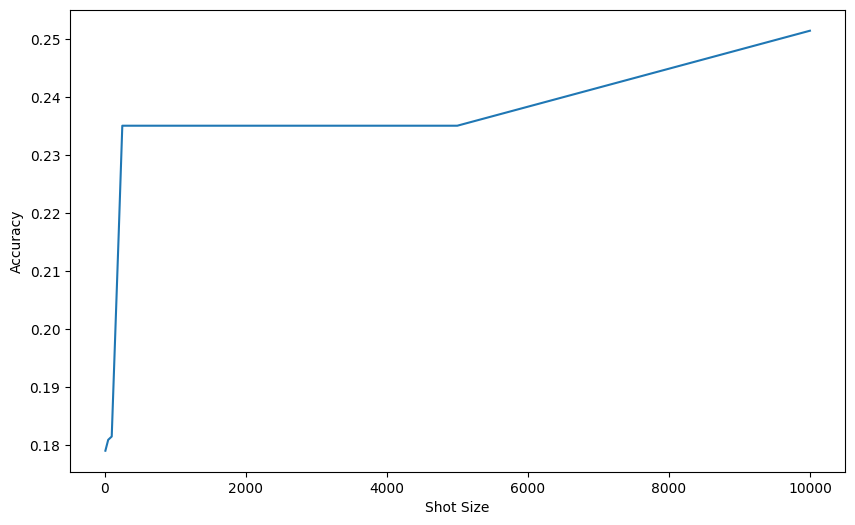

Retraining Samples:10
Testing Samples:24466
Retraining Time:19.150512218475342 seconds
Testing Time:11.299962520599365 seconds
Accuracy:0.17907337844371796

Retraining Samples:50
Testing Samples:24426
Retraining Time:17.18639612197876 seconds
Testing Time:10.915617227554321 seconds
Accuracy:0.1809527724981308

Retraining Samples:100
Testing Samples:24376
Retraining Time:23.6841402053833 seconds
Testing Time:12.620517253875732 seconds
Accuracy:0.18152475357055664

Retraining Samples:200
Testing Samples:24276
Retraining Time:20.605063676834106 seconds
Testing Time:13.266836404800415 seconds
Accuracy:0.21686549484729767

Retraining Samples:250
Testing Samples:24226
Retraining Time:19.51883602142334 seconds
Testing Time:11.842565059661865 seconds
Accuracy:0.2351282835006714

Retraining Samples:300
Testing Samples:24176
Retraining Time:19.882485151290894 seconds
Testing Time:10.696595907211304 seconds
Accuracy:0.2351282835006714

Retraining Samples:350
Testing Samples:24126
Retraining Time:

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
import time
shot_sizes=[10,50,100,200,250,300,350,400,500,1000,2000,5000,10000]
results=[]

for numshots in shot_sizes:
    retrained_model=tf.keras.models.clone_model(model)
    retrained_model.set_weights(model.get_weights())
    retrained_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    stratified_split=StratifiedShuffleSplit(test_size=len(X_test)-numshots,random_state=42)
    for train_idx,test_idx in stratified_split.split(X_test,Y_test):
        few_shot_indices=train_idx
        test_indices=test_idx

    X_FS=X_test[few_shot_indices]
    Y_FS=Y_test[few_shot_indices]
    X_test_new=X_test[test_indices]
    retrain_start_time=time.time()
    retrained_model.fit(X_FS,Y_FS,batch_size=64,epochs=5,verbose=0)
    retrain_time=time.time()-retrain_start_time
    test_start_time=time.time()
    test_loss,test_accuracy=retrained_model.evaluate(X_test,Y_test,verbose=0)
    test_time=time.time()-test_start_time

    results.append({'numretrainsamples':numshots,'numtestingsamples':len(X_test_new),'retrain_time':retrain_time,'test_time':test_time,'accuracy':test_accuracy})

plt.figure(figsize=(10,6))
plt.plot([r['numretrainsamples']for r in results],[r['accuracy']for r in results])
plt.xlabel('Shot Size')
plt.ylabel('Accuracy')
plt.show()

for result in results:
    print(f"Retraining Samples:{result['numretrainsamples']}")
    print(f"Testing Samples:{result['numtestingsamples']}")
    print(f"Retraining Time:{result['retrain_time']} seconds")
    print(f"Testing Time:{result['test_time']} seconds")
    print(f"Accuracy:{result['accuracy']}\n")